# NeuralTDA Plotting Routines

This purpose of this notebook is to create various plots of the results of topology computations on neural data

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pickle
import os
import sys
from ephys import core, events, rasters
from neuraltda import topology
import glob
import string
from scipy.io import wavfile
import scipy.signal as signal
from scipy.interpolate import interp1d

%pylab inline
reload(topology)

/Users/brad/anaconda/envs/neuraltda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


Populating the interactive namespace from numpy and matplotlib


<module 'neuraltda.topology' from '/Users/brad/GentnerLab/code/NeuralTDA/neuraltda/topology.pyc'>

# Load the data

Set 'block_path' to the path of the folder containing your post-manually sorted data

In [2]:

block_path = '/Volumes/gentner/btheilma/experiments/B1235/phy051316/Pen01_Lft_AP200_ML800__Site01_Z2200__B1235_cat_P01_S01_1/'
clusters   = core.load_clusters(block_path)
trials     = events.load_trials(block_path)
fs         = core.load_fs(block_path)
rec        = 0 

# Gather Topology Files

In [15]:
topofolder = os.path.join(block_path, 'topology/bht071216/B1235_cat_P01_S01_1-good-50ms-stim-permuted/')
persistence_files = sorted(glob.glob(os.path.join(topofolder, '*.pkl')))
topofolder

'/Volumes/gentner/btheilma/experiments/B1235/phy051316/Pen01_Lft_AP200_ML800__Site01_Z2200__B1235_cat_P01_S01_1/topology/bht071216/B1235_cat_P01_S01_1-good-50ms-stim-permuted/'

# Set Parameters for Plots

In [16]:
bird=1235
windt = 50
prd = 'stim'
nstim = 16
ntrials = 20
betti = 1
max_betti = 4
pen='01'
site='01'
plot_savepath = '/Volumes/gentner/btheilma/'

# Single Betti - All Trials - All Stimuli



TypeError: can't multiply sequence by non-int of type 'float'

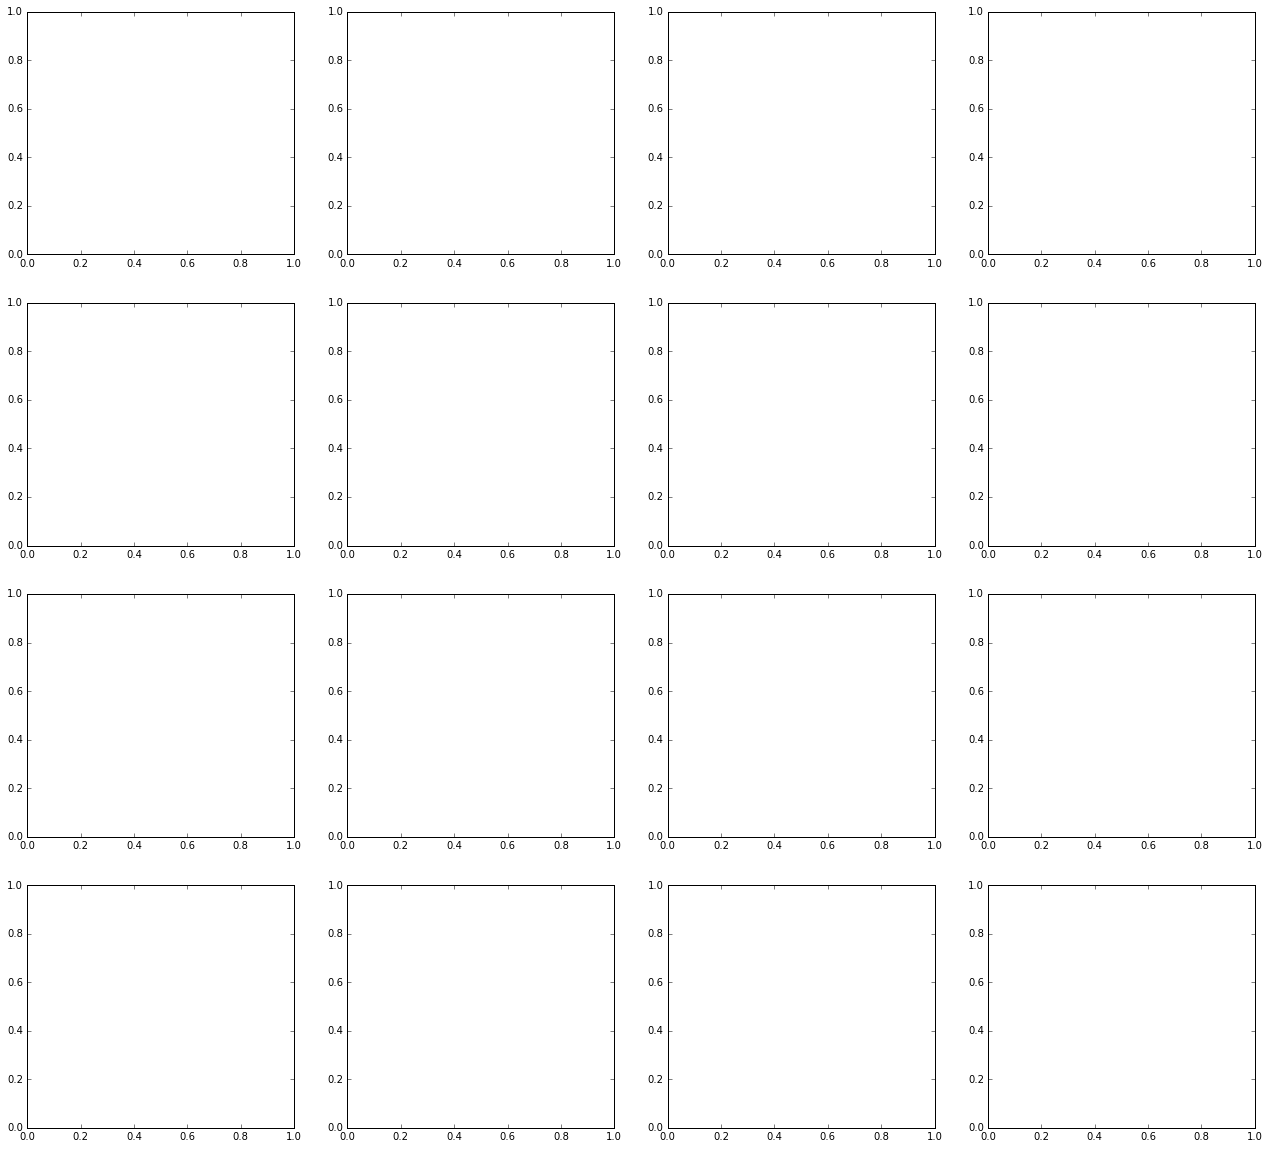

In [21]:

figsize = (22, 20)
fig, axs = plt.subplots(4, 4, figsize=figsize)

for stimind in range(len(persistence_files)):
    tf = persistence_files[stimind]
    tfilepath, tfilename = os.path.split(tf)
    stimname = list(string.ascii_lowercase)[stimind]
    pdata = pickle.load(open(tf, 'r'))
    
    ax = axs.flatten()[stimind]
    upper=0
    for trial in range(ntrials):     
        trialdata = pdata['{}'.format(str(trial))]
        betti1 = np.zeros([len(trialdata), 2])
        for ind, filt in enumerate(trialdata):
            
            betti1[ind, 0] = filt[0]*(windt/1000.)
            try: 
                betti1[ind, 1] = filt[1][betti]
            except IndexError:
                betti1[ind, 1] = 0
            
        upper = max([upper, max(betti1[:, 1])])
        #print(upper)
        
        #ax.set_xlim(0, 8)
        #ax.set_ylim(0, 10)
        pltcolor='b'
#        if stimname in ['stimA', 'stimB', 'stimC', 'stimD']:
#            pltcolor = 'r'
        ax.plot(betti1[:, 0], betti1[:,1], pltcolor, lw=2)
        ax.set_title('Stimulus: {}'.format(stimname))
        ax.set_xlabel('Time (seconds)')
        ax.set_ylabel('Betti Number Value')
        ax.set_ylim([0, upper+1])
plt.savefig(plot_savepath+'B{}_betti{}_timedep_{}ms_{}.png'.format(bird, betti, windt, prd))

In [ ]:
topofolder1 = '/mnt/cube/btheilma/experiments/B1235/phy051316/Pen01_Lft_AP200_ML800__Site01_Z2200__B1235_cat_P01_S01_1/topology/bht060716/B1235_cat_P01_S01_1-good_50ms_stim/'
topofolder2 = '/mnt/cube/btheilma/experiments/B1235/phy051316/Pen01_Lft_AP200_ML800__Site01_Z2200__B1235_cat_P01_S01_1/topology/bht060816/B1235_cat_P01_S01_1-good_50ms_stim/'
persistence_files1 = glob.glob(os.path.join(topofolder1, '*.pkl'))
persistence_files2 = glob.glob(os.path.join(topofolder2, '*.pkl'))
tfile1 = persistence_files1[0]
tfile2 = persistence_files2[0]
print(persistence_files1)
print(persistence_files2)

# Single Betti - Trial Average - All Stimuli

Uses step interpolation

In [ ]:
from scipy.interpolate import interp1d
t = np.linspace(0, 7, num=1000)
betticurves = np.zeros((ntrials, 1000))
bettiStimspline=[]
figsize = (22, 20)
fig, axs = plt.subplots(4, 4, figsize=figsize)


for stimind in range(len(persistence_files)):
    tf = persistence_files[stimind]
    tfilepath, tfilename = os.path.split(tf)
    stimname = list(string.ascii_lowercase)[stimind]
    pdata = pickle.load(open(tf, 'r'))
    #print(tf)
    upper=0
    bettiTrialspline=[]
    ax = axs.flatten()[stimind]
    for trial in range(20):
        
        trialdata = pdata['{}'.format(str(trial))]
        betti1 = np.zeros([len(trialdata), 2])
        for ind, filt in enumerate(trialdata):
            betti1[ind, 0] = filt[0]*windt/1000.
            try: 
                betti1[ind, 1] = filt[1][betti]
            except IndexError:
                betti1[ind, 1] = 0
                
        bettifunc = interp1d(betti1[:, 0], betti1[:, 1], kind='zero', bounds_error=False, fill_value=(betti1[0, 1], betti1[-1, 1]))
        betticurve = bettifunc(t)
        betticurves[trial, :] = betticurve
    avgbetticurve = np.mean(betticurves, axis=0)
    ax.plot(t, avgbetticurve, lw=2)
    ax.set_title('Stimulus: {}'.format(stimname))
    ax.set_xlabel('Time (seconds)')
    ax.set_ylabel('Betti Number Value')
   

# All Betti Numbers - Trial Average - Single Stimulus

In [ ]:

t = np.linspace(0, 7, num=1000)
betticurves = np.zeros((max_betti, ntrials, 1000))
bettiStimspline=[]

stimind = 15
tf = persistence_files[stimind]
tfilepath, tfilename = os.path.split(tf)
stimname = list(string.ascii_lowercase)[stimind]
pdata = pickle.load(open(tf, 'r'))

for trial in range(20): 
    trialdata = pdata['{}'.format(str(trial))]
    for betti_num in range(max_betti):
        betti1 = np.zeros([len(trialdata), 2])
        for ind, filt in enumerate(trialdata):
            betti1[ind, 0] = filt[0]*windt/1000.
            try: 
                betti1[ind, 1] = filt[1][betti_num]
            except IndexError:
                betti1[ind, 1] = 0
                
        bettifunc = interp1d(betti1[:, 0], betti1[:, 1], kind='zero', bounds_error=False, fill_value=(betti1[0, 1], betti1[-1, 1]))
        betticurve = bettifunc(t)
        betticurves[betti_num, trial, :] = betticurve
        
avgbetticurve = np.mean(betticurves, axis=1)

In [ ]:
# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'36', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'36'}

figsize = (22, 22)
fig = plt.figure(figsize=figsize)

ax = plt.subplot() # Defines ax variable by creating an empty plot

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(32)

plt.plot(t, avgbetticurve[0, :], t, avgbetticurve[1, :], t, avgbetticurve[2, :], t, avgbetticurve[3, :], lw=6)
plt.title('Stimulus: {}'.format(stimname), **title_font)
plt.xlabel('Time (seconds)', **axis_font)
plt.ylabel('Betti Number Value', **axis_font)

plt.legend(['Betti 0', 'Betti 1', 'Betti 2', 'Betti 3'], fontsize=36, loc=2)
plt.savefig('/home/brad/topology_figs/for_neurodinner/test.png')

# All Bettis - Trial Average - Single Stimulus - Plot with Stimulus Spectrogram

## Compute 

In [ ]:
stimind = 15
stimulus_file = '/home/brad/P_40k_warp.wav'

rate, song = wavfile.read('/home/brad/P_40k_warp.wav')
sf, st, sPxx = signal.spectrogram(song, rate)
plt.figure()
plt.imshow(np.log(sPxx), origin='lower', extent=[st[0], st[-1], sf[0], sf[-1]], aspect='auto')

from scipy.interpolate import interp1d

betticurves = np.zeros((max_betti, ntrials, len(st)))
bettiStimspline=[]

tf = persistence_files[stimind]
tfilepath, tfilename = os.path.split(tf)
stimname = list(string.ascii_lowercase)[stimind]
pdata = pickle.load(open(tf, 'r'))

for trial in range(ntrials):
        
    trialdata = pdata['{}'.format(str(trial))]
    for betti_num in range(max_betti):
        betti1 = np.zeros([len(trialdata), 2])
        for ind, filt in enumerate(trialdata):
            betti1[ind, 0] = filt[0]*windt/1000.
            try: 
                betti1[ind, 1] = filt[1][betti_num]
            except IndexError:
                betti1[ind, 1] = 0
                
        bettifunc = interp1d(betti1[:, 0], betti1[:, 1], kind='zero', bounds_error=False, fill_value=(betti1[0, 1], betti1[-1, 1]))
        betticurve = bettifunc(st)
        betticurves[betti_num, trial, :] = betticurve
        
avgbetticurve = np.mean(betticurves, axis=1)

## Plot

In [ ]:
# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'36', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'36'}

figsize = (22, 22)
f, pltaxes = plt.subplots(2, 1, figsize=(22,18), sharex=True)
ax = pltaxes[0]
# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(32)
    
song_spec_normed = sPxx / np.max(sPxx)
ax.imshow(np.log(song_spec_normed), origin='lower', extent=[st[0], st[-1], sf[0], sf[-1]], aspect='auto', cmap='spectral')
ax.set_ylabel('Frequency (Hz)', **axis_font)

ax=pltaxes[1]
# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(32)

ax.plot(st, avgbetticurve[0, :], st, avgbetticurve[1, :], st, avgbetticurve[2, :], st, avgbetticurve[3, :], lw=6)
ax.set_title('Stimulus: {}'.format(stimname), **title_font)
ax.set_xlabel('Time (seconds)', **axis_font)
ax.set_ylabel('Betti Number Value', **axis_font)
ax.set_xlim([st[0], st[-1]])

#plt.legend(['Betti 0', 'Betti 1', 'Betti 2', 'Betti 3'], fontsize=36, loc=2)
plt.savefig('/home/brad/topology_figs/for_neurodinner/B1235_P01S01_StimP_AllAvgBetti_withSpectrogram.png')

# All Betti Numbers - Trial Averages - All Stimuli

In [ ]:

t = np.linspace(0, 7, num=1000)
betticurves = np.zeros((max_betti, ntrials, 1000))
bettiStimspline=[]
figsize = (11, 11)
figsize = (22, 20)
fig, axs = plt.subplots(4, 4, figsize=figsize)

for stimind in range(nstim):
    tf = persistence_files[stimind]
    tfilepath, tfilename = os.path.split(tf)
    stimname = list(string.ascii_lowercase)[stimind]
    pdata = pickle.load(open(tf, 'r'))
    ax = axs.flatten()[stimind]
    for trial in range(ntrials):
        
        trialdata = pdata['{}'.format(str(trial))]
        for betti_num in range(max_betti):
            betti1 = np.zeros([len(trialdata), 2])
            for ind, filt in enumerate(trialdata):
                betti1[ind, 0] = filt[0]*windt/1000.
                try: 
                    betti1[ind, 1] = filt[1][betti_num]
                except IndexError:
                    betti1[ind, 1] = 0
                
            bettifunc = interp1d(betti1[:, 0], betti1[:, 1], kind='zero', bounds_error=False, fill_value=(betti1[0, 1], betti1[-1, 1]))
            betticurve = bettifunc(t)
            betticurves[betti_num, trial, :] = betticurve
        
    avgbetticurve = np.mean(betticurves, axis=1)

    ax.plot(t, avgbetticurve[0, :], t, avgbetticurve[1, :], t, avgbetticurve[2, :], t, avgbetticurve[3, :], lw=3)
    ax.set_title('Stimulus: {}'.format(stimname))
    ax.set_xlabel('Time (seconds)')
    ax.set_ylabel('Betti Number Value')
    ax.set_ylim([0, 14])
plt.savefig('/home/brad/B{}_P{}S{}_avgbettis_timedep_{}ms_{}.png'.format(bird, pen, site, windt, prd))

# All Betti Numbers - (Trial Averages + Single Trials) - One Stimulus


In [ ]:

t = np.linspace(0, 7, num=1000)

betticurves = np.zeros((max_betti, ntrials, 1000))
bettiStimspline=[]


stimind = 13
tf = persistence_files[stimind]
tfilepath, tfilename = os.path.split(tf)
stimname = list(string.ascii_lowercase)[stimind]
pdata = pickle.load(open(tf, 'r'))

for trial in range(20):
        
    trialdata = pdata['{}'.format(str(trial))]
    for betti_num in range(max_betti):
        betti1 = np.zeros([len(trialdata), 2])
        for ind, filt in enumerate(trialdata):
            betti1[ind, 0] = filt[0]*windt/1000.
            try: 
                betti1[ind, 1] = filt[1][betti_num]
            except IndexError:
                betti1[ind, 1] = 0
                
        bettifunc = interp1d(betti1[:, 0], betti1[:, 1], kind='zero', bounds_error=False, fill_value=(betti1[0, 1], betti1[-1, 1]))
        betticurve = bettifunc(t)
        betticurves[betti_num, trial, :] = betticurve
avgbetticurve = np.mean(betticurves, axis=1)


In [ ]:
# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'36', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'36'}

figsize = (22, 20)
fig, axs = plt.subplots(2, 2, figsize=figsize)

for bettinum in range(max_betti):
    ax = axs.flatten()[bettinum]

    # Set the tick labels font
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontname('Arial')
        label.set_fontsize(32)
    for trial in range(20):
        ax.plot(t, betticurves[bettinum, trial, :], 'b', lw=4)
        ax.set_title('Betti Number: {}'.format(bettinum), **title_font)
        #ax.set_xlabel('Time (seconds)', **axis_font)
        #ax.set_ylabel('Betti Number Value', **axis_font)
        ax.set_ylim([0, 16])
    ax.plot(t, avgbetticurve[bettinum, :], 'r', lw=6)
plt.savefig('/home/brad/topology_figs/for_neurodinner/B1235_P01S01_Stim13_AllBettis_TrialbyTrial.png')

# Single Betti - All Trials - All Permutations - All Stimuli

400


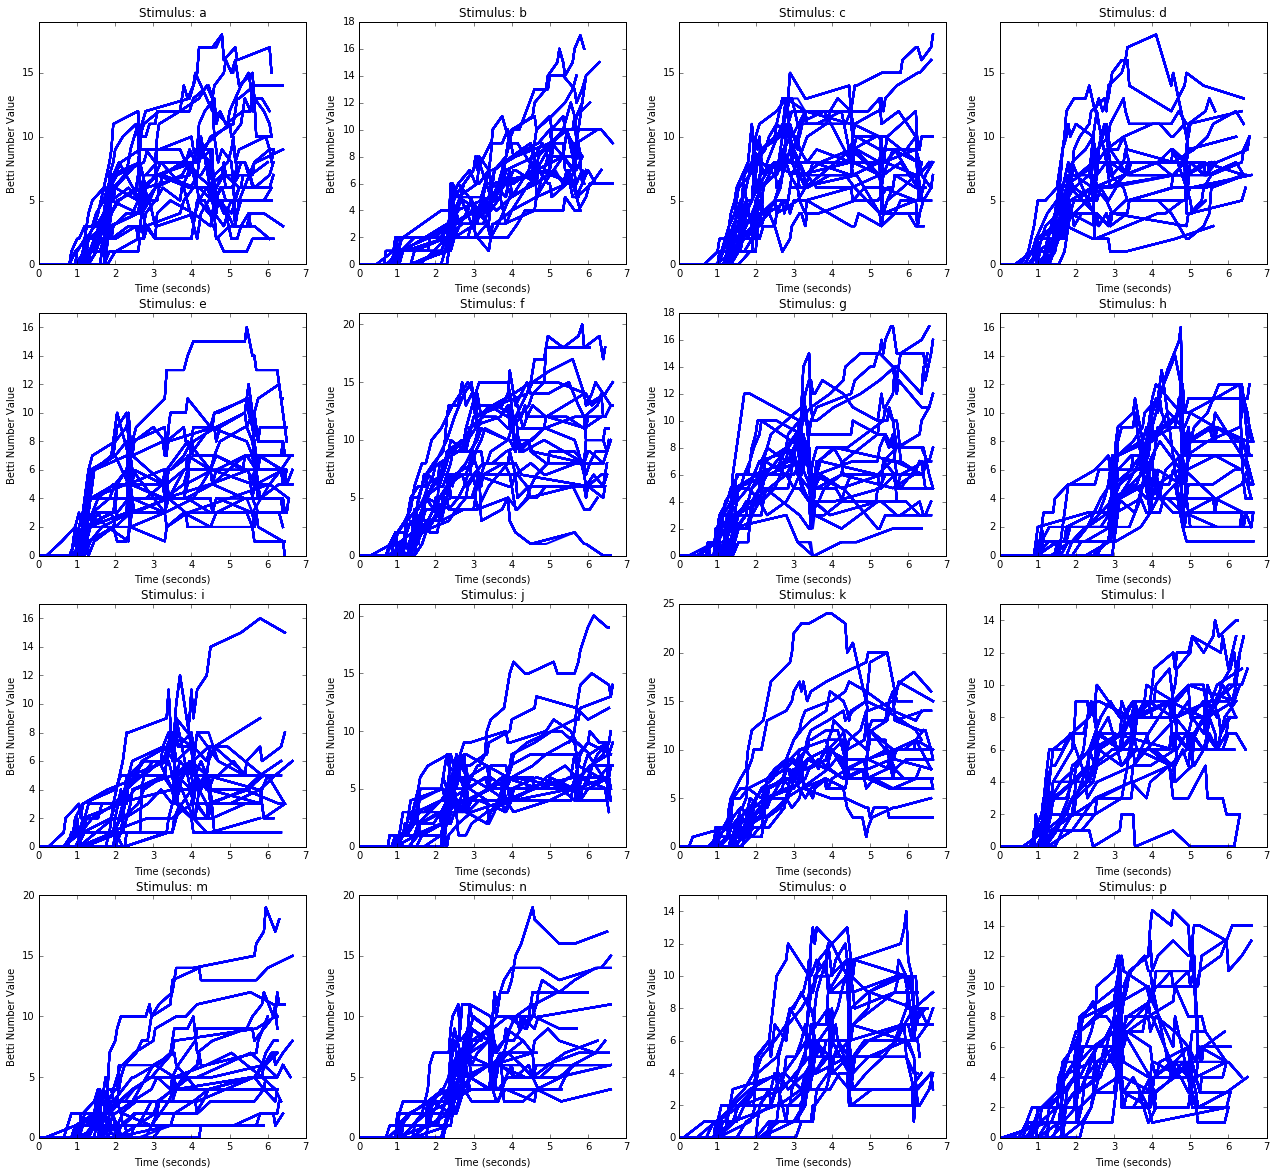

In [25]:

figsize = (22, 20)
fig, axs = plt.subplots(4, 4, figsize=figsize)

for stimind in range(len(persistence_files)):
    tf = persistence_files[stimind]
    tfilepath, tfilename = os.path.split(tf)
    stimname = list(string.ascii_lowercase)[stimind]
    pdata = pickle.load(open(tf, 'r'))
    ax = axs.flatten()[stimind]
    upper=0
    lns=0
    for trial in range(ntrials):     
        trialdata = pdata['{}'.format(str(trial))]
        for permnum, perm in enumerate(trialdata.keys()):
            permdata = trialdata['{}'.format(perm)]
            betti1 = np.zeros([len(permdata), 2])
            for ind, filt in enumerate(permdata):
                betti1[ind, 0] = filt[0]*(windt/1000.)
                try: 
                    betti1[ind, 1] = filt[1][betti]
                except IndexError:
                    betti1[ind, 1] = 0
            
            upper = max([upper, max(betti1[:, 1])])
            #print(upper)
        
            #ax.set_xlim(0, 8)
            #ax.set_ylim(0, 10)
            pltcolor='b'
#        if stimname in ['stimA', 'stimB', 'stimC', 'stimD']:
#            pltcolor = 'r'
            ax.plot(betti1[:, 0], betti1[:,1], pltcolor, lw=2)
            lns = lns+1
            ax.set_title('Stimulus: {}'.format(stimname))
            ax.set_xlabel('Time (seconds)')
            ax.set_ylabel('Betti Number Value')
            ax.set_ylim([0, upper+1])
print(lns)
plt.savefig(plot_savepath+'B{}_betti{}_{}ms_{}_permuted.png'.format(bird, betti, windt, prd))